In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [2]:
%matplotlib inline

from gEconpy.classes.model import gEconModel
from gEconpy.classes.transformers import IntervalTransformer
from gEconpy import compile_to_statsmodels
from gEconpy.plotting import plotting as gp


import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs
from src.gp_plotting import plot_sm_results
from src.filtering_sampling import solve_updated_mod

import numpy as np
import pandas as pd

import os

from config import plt_config
plt.rcParams.update(plt_config)

globals 

In [3]:
plot_vars = ['Y', 'C', 'L', 'w', 'r']

load model

In [30]:
rbc = gEconModel(os.path.join(MODEL_DIR, 'mod4_rbc.gcn'))
nkm = gEconModel(os.path.join(MODEL_DIR, 'mod5_nk_capital.gcn'))

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	7 parameters
		 0 / 7 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.

Model Building Complete.
Found:
	18 equations
	18 variables
	The following variables were eliminated at user request:
		TC_t
	The following "variables" were defined as constants and have been substituted away:
		B_t
	3 stochastic shocks
		 0 / 3 has a defined prior. 
	12 parameters
		 0 / 12 has a defined prior. 
	2 calibrating equations
	2 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [31]:
_, rbc = solve_updated_mod(rbc)
_, nkm = solve_updated_mod(nkm)

Steady state found! Sum of squared residuals is 6.695239551090784e-23
Solution found, sum of squared residuals:  8.256002816550977e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000
Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables.
Blanchard-Kahn condition is satisfied.
Steady state found! Sum of squared residuals is 1.4252511608935836e-20
Solution found, sum of squared residuals:  2.0693357695302694e-26
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000
Model solution has 7 eigenvalues greater than one in modulus and 5 forward-looking variables.
Blanchard-Kahn condition is satisfied.


IRF

In [33]:
shock_size = .1
sim_length = 120

irf_rbc = rbc.impulse_response_function(simulation_length=sim_length, shock_size=shock_size)
irf_nkm = nkm.impulse_response_function(simulation_length=sim_length, shock_size=shock_size)

In [34]:
from itertools import chain

In [35]:
shocks = list(set([*chain(
    list(set([item[1] for item in irf_rbc.unstack().index])),
    list(set([item[1] for item in irf_nkm.unstack().index]))
)]))

In [36]:
shocks

['epsilon_A', 'epsilon_R', 'epsilon_pi']

In [37]:
shock = 'epsilon_A'
try:
    _irf_rbc = irf_rbc.unstack().loc[:, shock].unstack()[plot_vars].copy()
except KeyError:
    _irf_rbc = None

_irf_nkm = irf_nkm.unstack().loc[:, shock].unstack()[plot_vars].copy()

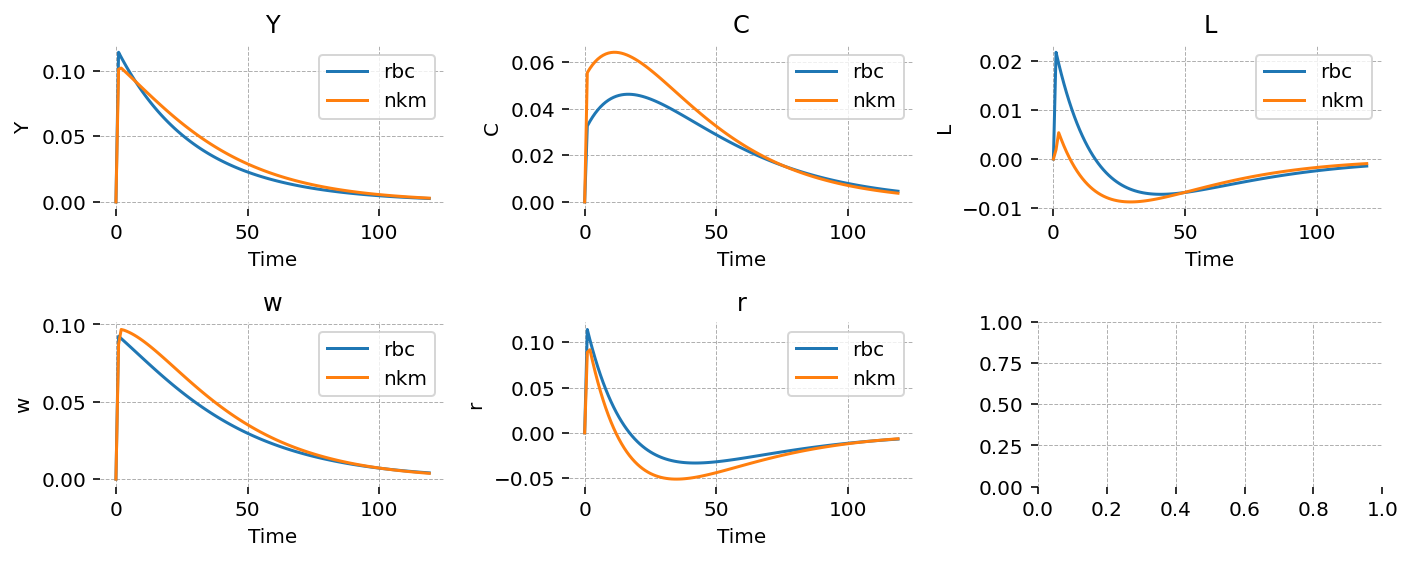

In [38]:
plot_dfs([item for item in [_irf_rbc, _irf_nkm] if type(item) == pd.DataFrame],
         sns.lineplot,
         figsize=(10, 2),
         legend=['rbc', 'nkm'])